In [2]:
ler_debentures_secundario <- function(ativo){
  stopifnot(is.character(ativo),length(ativo) == 1)
  url <- paste0("http://www.debentures.com.br/exploreosnd/consultaadados/mercadosecundario/precosdenegociacao_e.asp?ativo=",ativo,"&dt_ini=19700101&dt_fim=20291231")
  dados <- read.table(url, skip = 2, header = T, stringsAsFactors = F, sep = "\t",
                      dec = ",")
  dados$Data <- as.Date(dados$Data, "%d/%m/%Y")
  dados$PU.Máximo <- as.numeric(gsub(',','.',
                                     gsub('.','',dados$PU.Máximo, fixed = T), fixed = T))
  dados$PU.Médio <- as.numeric(gsub(',','.',
                                    gsub('.','',dados$PU.Médio, fixed = T), fixed = T))
  dados$PU.Mínimo <- as.numeric(gsub(',','.',
                                     gsub('.','',dados$PU.Mínimo, fixed = T), fixed = T))
  colnames(dados) <- c("Data","Emissor",
                       "Codigo","ISIN",
                       "Quantidade","Negocios",
                       "PU_Mínimo","PU_Médio",
                       "PU_Máximo","Percentual_Curva")
  return(View(dados))
}

In [2]:
grafico_debentures_secundario <- function(ativo){
  stopifnot(is.character(ativo),length(ativo) == 1)
  library(ggplot2)
  library(ggthemes)
  url <- paste0("http://www.debentures.com.br/exploreosnd/consultaadados/mercadosecundario/precosdenegociacao_e.asp?ativo=",ativo,"&dt_ini=19700101&dt_fim=20291231")
  dados <- read.table(url, skip = 2, header = T, stringsAsFactors = F, sep = "\t",
                      dec = ",")
  dados$Data <- as.Date(dados$Data, "%d/%m/%Y")
  dados$PU.Máximo <- as.numeric(gsub(',','.',
                                     gsub('.','',dados$PU.Máximo, fixed = T), fixed = T))
  dados$PU.Médio <- as.numeric(gsub(',','.',
                                    gsub('.','',dados$PU.Médio, fixed = T), fixed = T))
  dados$PU.Mínimo <- as.numeric(gsub(',','.',
                                     gsub('.','',dados$PU.Mínimo, fixed = T), fixed = T))
  colnames(dados) <- c("Data","Emissor",
                       "Codigo","ISIN",
                       "Quantidade","Negocios",
                       "PU_Mínimo","PU_Médio",
                       "PU_Máximo","Percentual_Curva")
  ggplot(dados, aes(x = Data))+
    geom_line(aes(y = PU_Médio), colour = "red", size = 0.5)+
    labs(x = "", y = "Preço médio R$", title = paste("Preço médio de", ativo),
         caption = "Fonte:debentures.com.br")+
    theme_economist()
}

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'ggthemes' was built under R version 3.6.3"

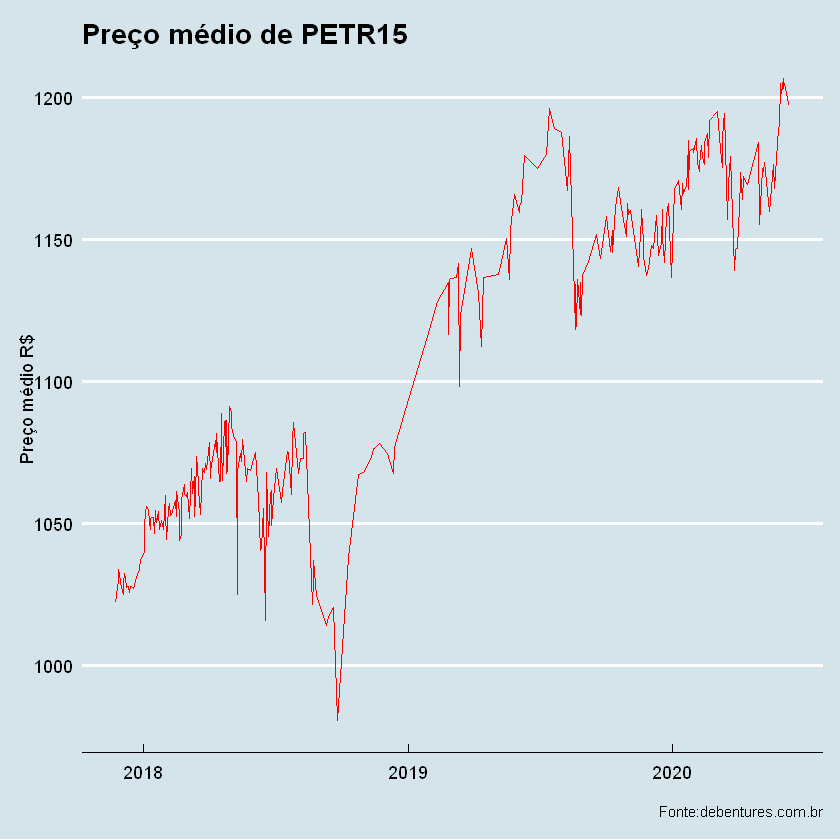

In [3]:
grafico_debentures_secundario("PETR15")